# Optimización de Hiperparámetros

¡Gracias Martín Gonella por la creación de los contenidos de este encuentro!


Comenzamos a trabajar con Optimización de Hiperparámetros en Python con Scikit-Learn, para ello vamos a empezar con ejemplo guiado usando como conjunto de datos el mismo dataset que en el Notebook anterior, Breast Cancer Wisconsin (diagnostic) dataset . Al finalizar, proponemos un análisis similar, pero con otro conjunto de datos. 

## 1. Breast Cancer Wisconsin (diagnostic) dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#Randomized search on hyper parameters.
from sklearn.metrics import confusion_matrix, accuracy_score

**Para investigar:** ¿Reconoces todas las librerías que acabamos de importar y sus objetos? Si no es así, recuerda simpre leer la documentación.

Importamos el dataset así como hicimos en el notebook anterior.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

Si observan la variable `data`, podrán notar que es un `diccionario`, por lo tanto vamos a proceder a convertirlo en un `DataFrame` de Pandas.

In [ ]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

Y, como ya lo exploramos, simplemente vamos a seleccionar los atributos que utilizaremos.

In [ ]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [ ]:
data = df[features_mean + ['target']]
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0




Procedemos a separar los `features` del `target`, para luego poder dividir los datos en conjunto de `train` y `test`.

In [ ]:
X = data.drop(['target'],axis=1)
y = data['target']

# Dividimos los datos en Train y Test
#primero EDA y luego hago la separacion
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Genial, ¡ya tenemos listos nuestros datos!

Ahora vamos a escoger un modelo de clasificación, vamos con un `KNeighborsClassifier`. Luego, puedes probar con algún otro clasificador.

In [ ]:
knn = KNeighborsClassifier() #objeto mi modelo

Como recordarás de la bitácora, vimos tres estrategias para realizar una optimización de hiperparámetros:

    * Manual.
    * Por grilla.
    * Aleatoria.
    
Como ya mencionamos la búsqueda manual puede resultar muy tediosa y poco eficiente, por lo tanto vamos a probar con las dos restantes: **aleatoria** y por **grilla**. Además, ya tenemos una idea del desempeño de estos modelos sobre este dataset del encuentro anterior.

### 1.1 Grid Search

Definamos las grillas que necesitamos para el `GridSearchCV`. ¿Que tipo de objeto - desde el punto de vista de la programación - es? Prestar atención también qué tipo de datos usamos para cada hiperparámetro. Como siempre, mirar la documentación de la clase.

In [ ]:
# Grilla para Grid Search consistente con el modelo que quiero analizar. (se veen la documentacion los hiperparametros  de mi modelo=)
#la grilla se hace apartir de los diccionarios, da un {key:value, key:value}
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], #pesos basados a la distancia, puntos mas alejados aporta menos que el mas cercano(no es lo mismo un punto pegado que lejos, respecto al rango de vecinos). o uniforme
              'leaf_size':[1,3,5,7,10],  #
              'algorithm':['auto', 'kd_tree']} #tipo de optimizacion a utilizar

Una vez definida la grilla, ya podemos entrenar el modelo. 

In [ ]:
# ESTRATEGIA 1: Grid Search
#tengo 4 hiperparam, 20*2*5*2 elementos de los hiperparametros. se calcularán 600 modelos y 5 Cross validation. en total se calculan 3000 modelos.
model = GridSearchCV(knn, param_grid=param_grid, cv=5) #hacemos entrenamiento del modelo, sino tambien valido modelos (metricas)

#la demora depende tambien de la cantidad de datos (569,10)
#si duplico cv, se quintiplica la cantidad de modelos!, el cambio es más exponencial no lineal.



#escuchar clase.
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
#el fit es distinto al que hemos visto hasta ahora.
model.fit(X_train, y_train) #aquí lo que hago es mapear datos y calcula el desempeño en cada uno de los folds (ppt 13). Mapeo datos, entreno, HACE pronosticos y valido con los datos TRAIN
#el fit del knn solo es mapea los datos knn.fit()


#el entrenamiento de un knn (en DT calcula los parametros con la impureza de gini), el proceso, lo que hace en el fit
##es como una supervisacion de un modelo no supervisado con variable objetivo# .. el proceso de entrenamiento es simplemente mapear los datos (los datos estan en dada posicion). Es como que genera mi punto de referencia
#el problema del knn calcula la distancia respecto a los puntos mapeados.

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Genial, ya tenemos entrenado nuestro modelo KNN para una grilla de hiperparámetros. Además, dichas búsquedas por grilla vienen acompañadas de un validación cruzada, por lo cuál también hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.

<img src="https://media.giphy.com/media/rVbAzUUSUC6dO/giphy.gif" width="400" />

**Pero, ¿Cómo elijo la mejor configuración? ¿Cuál es la mejor performance? ¿Y el resto de los resultados?**

**Pista:** La respuesta correcta siempre se encuentra en la documentación.

Existen 3 atributos del modelo (clase de la librería sklearn) que nos van a ayudar a responder éstas preguntas: `best_params_`, `best_score_` y `cv_results_`

**Para investigar:** Antes de continuar con la ejecución de la notebbok, lee un poco más acerca de la documentación en general de [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) y [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) y en particular sobre los 3 atributos que acabamos de mencionar.



------------------------------------------------------------------


**Refit**
  
    bool, str, or callable, default=True

    Refit an estimator using the best found parameters on the whole dataset.
    For multiple metric evaluation, this needs to be a str denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.
    Where there are considerations other than maximum score in choosing a best estimator, refit can be set to a function which returns the selected best_index_ given cv_results_. In that case, the best_estimator_ and best_params_ will be set according to the returned best_index_ while the best_score_ attribute will not be available.
    The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance.
    Also for multiple metric evaluation, the attributes best_index_, best_score_ and best_params_ will only be available if refit is set and all of them will be determined w.r.t this specific scorer.


Attributes

`best_estimator_estimator`

    Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.

    See refit parameter for more information on allowed values.
`best_score_float`

    Mean cross-validated score of the best_estimator

    For multi-metric evaluation, this is present only if refit is specified.

    This attribute is not available if refit is a function.
`best_params_dict`

    Parameter setting that gave the best results on the hold out data.

    For multi-metric evaluation, this is present only if refit is specified.
best_index_int

    The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.

    The dict at search.cv_results_['params'][search.best_index_] gives the parameter setting for the best model, that gives the highest mean score (search.best_score_).

    For multi-metric evaluation, this is present only if refit is specified.
`scorer_function or a dict`

    Scorer function used on the held out data to choose the best parameters for the model.

    For multi-metric evaluation, this attribute holds the validated scoring dict which maps the scorer key to the scorer callable.
--------------------------------------------------------------------


In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!


scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003269,0.002295,0.003987,0.000302,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
1,0.002069,0.000078,0.001906,0.000094,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
2,0.002123,0.000122,0.003919,0.000056,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.835294,0.847059,0.835294,0.811765,0.844952,0.027685,371
3,0.002167,0.000263,0.002189,0.000513,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,341
4,0.002415,0.000430,0.004373,0.000816,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.895349,0.894118,0.941176,0.811765,0.870588,0.882599,0.042162,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.001846,0.000113,0.001898,0.000042,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.870588,0.941176,0.835294,0.870588,0.882599,0.034986,31
376,0.001764,0.000038,0.003948,0.000091,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.870588,0.952941,0.835294,0.870588,0.887278,0.039898,1
377,0.001768,0.000031,0.001901,0.000053,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.895349,0.882353,0.941176,0.835294,0.870588,0.884952,0.034491,11
378,0.001889,0.000058,0.004019,0.000104,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,131


En este DataFrame están todos los resultados que devuelve `GridSearchCV()`. Hay mucha información para explorar, pero corre las siguientes celdas antes de hacerlo.

Ya leímos la documentación y por lo tanto ya sabemos que podemos predecir con el mejor modelo de la siguiente manera:

In [ ]:
#luego de buscar el mejor hiperparametro hago el predict con mi modelo optimizado
#Predecimos en los datos de test
prediction = model.predict(X_test)
Pred_train=model.predict(X_train)

¿Por qué predecimos sobre el conjunto de test?¿Estuvo involucrado este conjunto en el entrenamiento del modelo?

In [ ]:
# Matriz de Confusion...Con datos que nunca vio "falla" con 11 datos, los demás los ve
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)
#ojo estamos suponiendo que los datos que tengo son lo más fiel a la realidad (pueden estar sesgados por cómo se sacó la muestra, entonces no hay forma de acercarme a la realidad por el sesgo. pero suponemos que son viables si no tenemos otros)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [ ]:
print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!

#acá los valido con la realidad!!! en condiciones ideales puede andar bien el modelo

Exactitud test: 0.9230769230769231
Exactitud train: 0.8849765258215962
Mejor Score: 0.8872777017783857



In [ ]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

#clase(escuchar lo que dijo eduardo y andres.. lo principal es plantear el problema a solucionar ej pronosticar mejor mis pacientes, procesos de respuesta, si hago algo o no)

#veo que quisiera ver, quiero pronosticar muchos así me equivoque o que mis pronosticos a pesar de ser poquitos sean de calidad
#por la naturaleza de la enfermedad quiero que mis pronosticos sean de la mejor calidad posoible para dar el mejor tratamiento.
#si quiero pronosticar las personas que tinen canser, la mejor metrica para optimizar es el presicion!! # la especificidad del metodo 

#pensando en la muestra, recall (denominado igualmente sensibilidad o exhaustividad)
#ojo no está tan nivelado el dataset entonces no veo el accuracy

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



**Para pensar**: ¿mejoró el desempeño del modelo con respecto a lo que hicimos en la bitácora anterior?

Mejora porque se busca los mejores parametros e hiperparametros para clasificar, lo cual la metrica mejora


-¿Qué otros hiperparámetros puedes explorar para ver si mejora el desempeñó?

Para el Knn se puede ver el tema de los pesos de los vecinos, o la metrica de distancia.



-¿Se puede hacer una mejor exploración de los resultados de `GridSearchCV`? Ahora sí, tómate un tiempo para explorar toda la información que devuelve.





**Ejercicio - Challenge:** Repite lo que hicimos, pero para un árbol de decisión. Algunos hiperparámetros que pueden ser interesantes de explorar, en este caso, son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.

In [ ]:
X = data.drop(['target'],axis=1)
y = data['target']

# Dividimos los datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#DT classifier
from sklearn.tree import DecisionTreeClassifier
dtree_model=DecisionTreeClassifier()
#veo los parametros 
dtree_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
# Grilla para Grid Search
#https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier
#criterion, max_depth, min_samples_split y min_samples_leaf.
#numero de muestra por muestra minimo para seguir haciendo la separacion (min split y leaf)
max_depth_range=np.arange(2, 20)
min_samples_split_range=np.arange(2, 10)
min_samples_leaf_range=np.arange(2, 10)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_depth_range},
              {'min_samples_leaf': min_samples_leaf_range,'min_samples_split': min_samples_split_range}]


#seguir
#https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489



Una vez definida la grilla, ya podemos entrenar el modelo. 

In [ ]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(dtree_model, param_grid=tree_param, cv=5)
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini'],
                  

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores


Mejores parametros: {'criterion': 'entropy', 'max_depth': 4}
Mejor Score: 0.9365526675786594



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003977,0.001592,0.001418,0.000793,entropy,2,NaN,NaN,"{'criterion': 'entropy', 'max_depth': 2}",0.918605,0.929412,0.917647,0.882353,0.929412,0.915486,0.017321,22
1,0.003956,0.000898,0.001160,0.000187,entropy,3,NaN,NaN,"{'criterion': 'entropy', 'max_depth': 3}",0.918605,0.929412,0.905882,0.917647,0.894118,0.913133,0.012079,35
2,0.003445,0.000153,0.000904,0.000017,entropy,4,NaN,NaN,"{'criterion': 'entropy', 'max_depth': 4}",0.965116,0.929412,0.905882,0.917647,0.964706,0.936553,0.024321,1
3,0.003673,0.000240,0.000931,0.000056,entropy,5,NaN,NaN,"{'criterion': 'entropy', 'max_depth': 5}",0.941860,0.929412,0.894118,0.905882,0.929412,0.920137,0.017459,14
4,0.003746,0.000124,0.001180,0.000524,entropy,6,NaN,NaN,"{'criterion': 'entropy', 'max_depth': 6}",0.953488,0.929412,0.870588,0.894118,0.894118,0.908345,0.029367,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002674,0.000059,0.000878,0.000016,NaN,NaN,9,5,"{'min_samples_leaf': 9, 'min_samples_split': 5}",0.895349,0.917647,0.917647,0.894118,0.917647,0.908482,0.011232,58
96,0.002684,0.000114,0.000877,0.000014,NaN,NaN,9,6,"{'min_samples_leaf': 9, 'min_samples_split': 6}",0.895349,0.905882,0.917647,0.894118,0.917647,0.906129,0.010256,71
97,0.002826,0.000206,0.000940,0.000095,NaN,NaN,9,7,"{'min_samples_leaf': 9, 'min_samples_split': 7}",0.895349,0.929412,0.917647,0.894118,0.917647,0.910834,0.013836,47
98,0.002683,0.000055,0.000883,0.000008,NaN,NaN,9,8,"{'min_samples_leaf': 9, 'min_samples_split': 8}",0.895349,0.905882,0.917647,0.894118,0.917647,0.906129,0.010256,71


In [ ]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

print('Exactitud:', accuracy_score(y_test, prediction))

# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)



Matriz de confusión:
[[47  7]
 [ 0 89]]
Exactitud: 0.951048951048951
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        54
         1.0       0.93      1.00      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [ ]:
type(report) #te devuelve un texto, puede decir que sea diccionario
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

str

### 1.2 Random Search

La metodología es muy parecida. La principal diferencia radica en que, para crear la grilla, ya no debemos pasar valores para los hiperparámetros, sino un generador aleatorio para cada atributo, en aquellos atributos que queremos que explore aleatoriamente.

In [ ]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}


Presta atenció a la documentación, para entender qué hace (es un poco larga, con el comienzo es suficiente):

In [ ]:
#help(sp.stats.randint) #A uniform discrete random variable.

Ya podemos entrenar nuestro modelo. Presta atención al parámetro `n_iter`.

In [ ]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
#este fit se demora muchisimo menos! no hace toda la vuelta del grid.

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f110056c630>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f11005291d0>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=Tr

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores #es el score del CV no del train

Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 18, 'weights': 'uniform'}
Mejor Score: 0.8872777017783857



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001800,0.000169,0.001680,0.000070,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.858824,0.858824,0.823529,0.800000,0.847305,0.032792,88
1,0.001997,0.000335,0.001839,0.000100,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
2,0.001785,0.000076,0.004013,0.000159,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.906977,0.858824,0.952941,0.823529,0.870588,0.882572,0.044139,36
3,0.001788,0.000018,0.003906,0.000088,kd_tree,7,13,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.858824,0.877893,0.039197,57
4,0.001771,0.000027,0.001767,0.000028,kd_tree,7,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001687,0.000024,0.001742,0.000028,auto,6,12,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.870588,0.882599,0.038020,8
96,0.001782,0.000061,0.001840,0.000021,auto,3,14,distance,"{'algorithm': 'auto', 'leaf_size': 3, 'n_neigh...",0.895349,0.882353,0.941176,0.823529,0.858824,0.880246,0.039040,49
97,0.001736,0.000053,0.001742,0.000036,kd_tree,7,11,distance,"{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_ne...",0.895349,0.870588,0.941176,0.823529,0.870588,0.880246,0.038325,47
98,0.002019,0.000070,0.003851,0.000019,auto,1,4,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.872093,0.870588,0.917647,0.800000,0.858824,0.863830,0.037708,84


¿Encontró algo parecido a Grid Search?
No encontró el mejor parametro e hiper que diese el mejor score.
¿Fue más rápido?
Si.

In [ ]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

Pred_train=model.predict(X_train)

print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!



Exactitud test: 0.9230769230769231
Exactitud train: 0.8849765258215962
Mejor Score: 0.8872777017783857



In [ ]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[44 10]
 [ 1 88]]


In [ ]:
# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        54
         1.0       0.90      0.99      0.94        89

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



Lo hago para DT clasifier


In [ ]:
# Grilla para Random Search

from scipy.stats import randint

param_dist = {"max_depth":sp.stats.randint(1, 20),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(dtree_model, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(dtree_model, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores


Mejores parametros: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 1}
Mejor Score: 0.9365526675786594



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002417,0.000200,0.000888,0.000039,gini,16,6,1,"{'criterion': 'gini', 'max_depth': 16, 'max_fe...",0.918605,0.870588,0.894118,0.917647,0.941176,0.908427,0.024073,36
1,0.003032,0.000078,0.000869,0.000036,entropy,4,8,2,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.883721,0.941176,0.917647,0.894118,0.941176,0.915568,0.023623,13
2,0.002385,0.000088,0.000847,0.000008,entropy,19,5,8,"{'criterion': 'entropy', 'max_depth': 19, 'max...",0.906977,0.905882,0.905882,0.894118,0.823529,0.887278,0.032221,82
3,0.001807,0.000075,0.000840,0.000004,gini,13,3,2,"{'criterion': 'gini', 'max_depth': 13, 'max_fe...",0.883721,0.835294,0.905882,0.905882,0.800000,0.866156,0.041938,95
4,0.002310,0.000127,0.000852,0.000004,gini,8,8,7,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.930233,0.917647,0.835294,0.905882,0.917647,0.901341,0.033910,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002949,0.000052,0.000877,0.000024,entropy,9,8,8,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.883721,0.905882,0.917647,0.894118,0.870588,0.894391,0.016452,68
96,0.001693,0.000058,0.000856,0.000003,entropy,18,1,5,"{'criterion': 'entropy', 'max_depth': 18, 'max...",0.918605,0.847059,0.858824,0.894118,0.894118,0.882544,0.026039,86
97,0.001697,0.000079,0.000863,0.000015,entropy,1,4,5,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.837209,0.917647,0.905882,0.823529,0.870588,0.870971,0.036846,93
98,0.001459,0.000019,0.000844,0.000012,gini,1,3,7,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.872093,0.917647,0.847059,0.894118,0.800000,0.866183,0.040521,94


In [ ]:

#Predecimos en los datos de test
prediction = model.predict(X_test)

# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

# Reporte de Clasificacion
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)


Pred_train=model.predict(X_train)

print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!


Matriz de confusión:
[[50  4]
 [ 7 82]]
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        54
         1.0       0.95      0.92      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Exactitud test: 0.9230769230769231
Exactitud train: 0.971830985915493
Mejor Score: 0.9365526675786594




#acá muestra un reporte completo más prolijo un pipeline!!!!
#https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

In [ ]:
#para buscar el tiempo de respuesta
from sklearn.model_selection import cross_validate

knn_scores = cross_validate(knn, X, y, cv=5)
print(knn_scores)

{'fit_time': array([0.00343513, 0.00208473, 0.00204086, 0.00198293, 0.0018301 ]), 'score_time': array([0.00766802, 0.00474596, 0.00457549, 0.0046258 , 0.0045352 ]), 'test_score': array([0.85087719, 0.85087719, 0.88596491, 0.94736842, 0.89380531])}


---
## Se acabo la parte guiada, ahora es tú turno...


    
Ahora es tú turno de aplicar todo lo aprendido con un nuevo conjunto de datos. Para ello, vamos a generarlo de manera artificial usando la función [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) de sklearn.

**Ejercicios:** Copiar lo de arriba  y hacer 

1. Explora el espacio de hiperparámetros con `Grid Search` de un árbol de decisión, entrenado con el dataset artificial antes mencionado. Elige aquellos hiperparámetros que maximicen la exactitud. Luego, evalúa la performance en el conjunto de Test y comparala con la obtenida por `Grid Search` ¿Son diferentes? ¿A qué se deberá? 

Algunas recomendaciones útiles:
   * Recuerda que el espacio a explorar es definido a través de un diccionario. Algunas variables que pueden ser interesantes de explorar, en el caso de un árbol de decisión son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.
   * Los resultados del `GridSearchCV` se encuentran en un diccionario que se accede con `.cv_results_`. Si quieres conocer las *keys* de ese diccionario, pueden usar `.cv_results_.keys()`
   * `GridSearchCV` entrena al final un modelo utilizando todo el conjunto de entrenamiento, con los mejores parámetros que encontró. Por lo tanto, se puede usar ese modelo para predecir con `.predict()`
   * Les recomendamos tener a mano la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de `GridSearchCV` en Scikit-Learn.
    
2. Repite el ejercicio 1, pero esta vez evaluando precisión, exhaustividad, F-Score y AUC-ROC. 

**Notar** que se pueden evaluar múltiples métricas a la vez. También notar que si no eligen una métrica por sobre las otras, `GridSearchCV` no puede reentrenar con el mejor modelo. ¿Cómo son los hiperparámetros que maximizan cada métrica? Por ejemplo, compara entre precisión y exhaustividad.

3. **Opcional 1:** repite los ejercicios 1 y 2 pero esta vez utilizando un `Random Search`.
4. **Opcional 2:** Si aún tienes tiempo y ganas, repite para un `clasificador KNN`.

In [ ]:
###scoring="accuracy") aca cambio todo 
#https://stackoverflow.com/questions/53567617/how-to-set-own-scoring-with-gridsearchcv-from-sklearn-for-regression

In [ ]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_informative=4,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=40)

#genera un conjunto de datos nuevos

In [ ]:
import pandas as pd
df = pd.DataFrame()
for i in range(X.shape[1]):
    df['x' + str(i)] = X[:,i]
df['y'] = y 
df.head()

,x0,x1,x2,x3,y
0,-0.937891,0.685962,-0.593657,-0.115547,0
1,-0.394032,0.491726,0.743904,-0.644296,1
2,0.435997,-1.052152,0.087037,0.535453,1
3,-0.092236,-0.317438,-1.059007,-2.488850,1
4,-1.829864,0.008258,0.311800,1.014309,1


Exploremos un poco el dataset con el que vamos a trabajar.

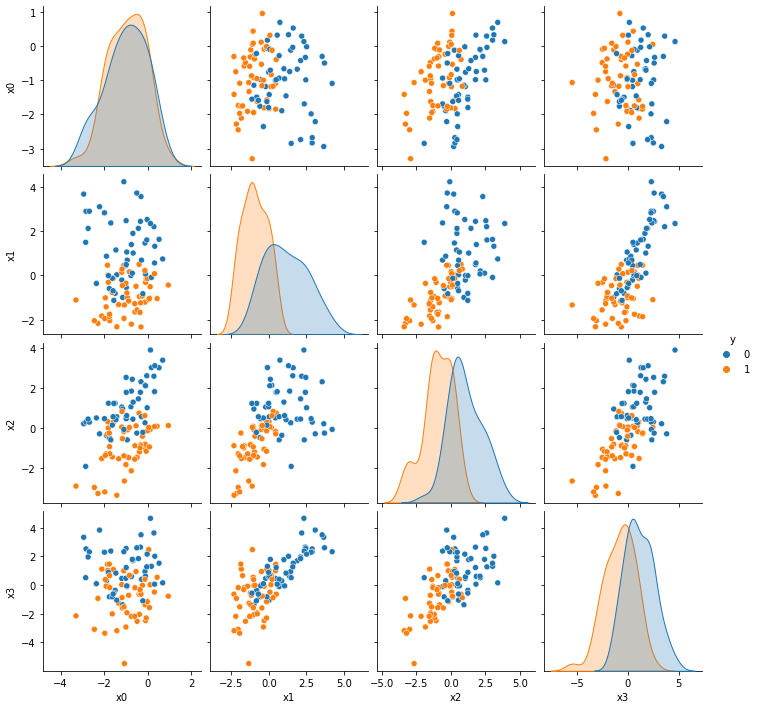

In [ ]:
sns.pairplot(data = df, vars = df.columns[:-1], hue = 'y');

In [ ]:
#copiar lo que hice antes
# Explora el espacio de hiperparámetros con Grid Search de un árbol de decisión, 
#entrenado con el dataset artificial antes mencionado. Elige aquellos hiperparámetros que maximicen la exactitud. 
#Luego, evalúa la performance en el conjunto de Test y comparala con la obtenida por Grid Search
#¿Son diferentes? ¿A qué se deberá?

#Algunas recomendaciones útiles:
#Recuerda que el espacio a explorar es definido a través de un diccionario. Algunas variables que pueden ser interesantes de explorar, en el caso de un árbol de decisión son: criterion, max_depth, min_samples_split y min_samples_leaf.
#    Los resultados del GridSearchCV se encuentran en un diccionario que se accede con .cv_results_. Si quieres conocer las keys de ese diccionario, pueden usar .cv_results_.keys()
#    GridSearchCV entrena al final un modelo utilizando todo el conjunto de entrenamiento, con los mejores parámetros que encontró. Por lo tanto, se puede usar ese modelo para predecir con .predict()
#    Les recomendamos tener a mano la documentación de GridSearchCV en Scikit-Learn.


In [ ]:

#Las distribuciones están más "traslapadas" superpuestas, entonces no es tan sencillo el problema.
#tengo que crear variables para poder ver mejor los datos. (escuchar lo de andres)
#veo las variables
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#Randomized search on hyper parameters.
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#1°
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#2°creo modelo arbol de descicion
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


In [ ]:
#3° defino los hiperparametros para un grid
# Grilla con los parametros (es importante conocer qué hiperparametro busco)
param_grid = {'criterion': ['gini', 'entropy'], #como hago la division de los datos, las fronteras
              'max_depth':np.arange(1, 20), #profundidad del arbol
              'min_samples_split':np.arange(2,5),
              'min_samples_leaf':np.arange(2, 5)} #cantidad minima de hojas por cada rama (cuantas divisiones en cada rama, lo restrigo y que nolo hago automaticamente)

In [ ]:
#4°Defino la grilla para entrenar el modelo

#model, es el objeto que me hace todos los arboles
model = GridSearchCV(tree, param_grid=param_grid, cv=5) #genera 2000 modelos! 2*20*10--*5
# Entrenamos:
model.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
#5° modelo entrenado, quiero ver el mejor resultado

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


Mejores parametros: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor Score: 0.9199999999999999



#pruebo con randomsearch

NameError: ignored

In [ ]:
#1°
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#2°creo modelo arbol de descicion
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


In [ ]:
#3° defino los hiperparametros para un grid
# Grilla con los parametros (es importante conocer qué hiperparametro busco)
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

#otro para tocar  'splitter':["best", "random"]

In [ ]:
#4°Defino la grilla para entrenar el modelo
model = RandomizedSearchCV(tree, param_dist,n_iter=100, random_state=0, cv=5)

#model, es el objeto que me hace todos los arboles
# Entrenamos:
model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
#5° modelo entrenado, quiero ver el mejor resultado

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


In [ ]:
#6° lo valido con la informacion test
#predigo los datos test
prediction = model.predict(X_test) 




#veo si esta nivelado, igual numero de fuera de la diagonal
#veo el accuracy
Pred_train=model.predict(X_train)

print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!


#puedo concluir que el modelo es generalizable con este mejor modelo
#1ro el mejor modelo puede empeorar o no al cambiar modelo, depende mucho de los tiempos que tardan
#2do es un buen modelo condatos nunca visto. 
#qué tanto se diferencian los datos de test con los de prueba. 

#tendria que buscar otro modelo y ver cual gana!

#pruebo con knn

In [ ]:
#1°
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
knn = KNeighborsClassifier() #objeto mi modelo

In [ ]:
# Grilla para Grid Search consistente con el modelo que quiero analizar. (se veen la documentacion los hiperparametros  de mi modelo=)
#la grilla se hace apartir de los diccionarios, da un {key:value, key:value}
param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], #pesos basados a la distancia, puntos mas alejados aporta menos que el mas cercano(no es lo mismo un punto pegado que lejos, respecto al rango de vecinos). o uniforme
              'leaf_size':[1,3,5,7,10],  #
              'algorithm':['auto', 'kd_tree']} #tipo de optimizacion a utilizar

Una vez definida la grilla, ya podemos entrenar el modelo. 

In [ ]:
# ESTRATEGIA 1: Grid Search
#tengo 4 hiperparam, 20*2*5*2 elementos de los hiperparametros. se calcularán 600 modelos y 5 Cross validation. en total se calculan 3000 modelos.
model = GridSearchCV(knn, param_grid=param_grid, cv=5) #hacemos entrenamiento del modelo, sino tambien valido modelos (metricas)

#la demora depende tambien de la cantidad de datos (569,10)
#si duplico cv, se quintiplica la cantidad de modelos!, el cambio es más exponencial no lineal.



#escuchar clase.
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
#el fit es distinto al que hemos visto hasta ahora.
model.fit(X_train, y_train) #aquí lo que hago es mapear datos y calcula el desempeño en cada uno de los folds (ppt 13). Mapeo datos, entreno, HACE pronosticos y valido con los datos TRAIN
#el fit del knn solo es mapea los datos knn.fit()


#el entrenamiento de un knn (en DT calcula los parametros con la impureza de gini), el proceso, lo que hace en el fit
##es como una supervisacion de un modelo no supervisado con variable objetivo# .. el proceso de entrenamiento es simplemente mapear los datos (los datos estan en dada posicion). Es como que genera mi punto de referencia
#el problema del knn calcula la distancia respecto a los puntos mapeados.

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!


In [ ]:
#luego de buscar el mejor hiperparametro hago el predict con mi modelo optimizado
#Predecimos en los datos de test
prediction = model.predict(X_test)
Pred_train=model.predict(X_train)

In [ ]:
print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!

#acá los valido con la realidad!!! en condiciones ideales puede andar bien el modelo

#Pruebo knn con randomsearch

In [ ]:
# ESTRATEGIA 2: Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
#este fit se demora muchisimo menos! no hace toda la vuelta del grid.

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


In [ ]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

Pred_train=model.predict(X_train)

print('Exactitud test:', accuracy_score(y_test, prediction))
print('Exactitud train:', accuracy_score(y_train, Pred_train))
print("Mejor Score: "+str(model.best_score_)+'\n') # el score estaría sesgado? sobresesgado? respecto a la realidad-->puede ser mayor a la realidad . tengo que contrastar con los datos de prueba!!!!



In [ ]:
#scoring=["presicion","recall",]
#https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring

Rehacer porque se me cerró sin guardar. y mejorar 
para los scoring
usar gridsearch DT y Knn
usar randomsearch DT y Knn